In [23]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import csv
import importlib
from tqdm import tqdm
from scripts import proj1_helpers, helpers, implementation, feature_processing, k_fold, model_linear, model_logistic, plots
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
train_path = '../data/train.csv'
test_path  = '../data/test.csv'

In [ ]:
# loading data
y, X, idx = proj1_helpers.load_csv_data(train_path)
y_t, X_t, ids_t = proj1_helpers.load_csv_data(test_path)

In [32]:
model = implementation.ridge_regression
loss = model_linear.compute_accuracy_loss#compute_loss_reg

lambdas = [0]#np.logspace(-5,1,10)

In [31]:
np.min(X)

-999.0

No preprocessing

In [36]:
X_p = feature_processing.add_polynomial(X, [], max_degrees = [])
idx_min, loss_val_all, lambdas = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1, k_fold = 5, lambdas = lambdas, do_plot = False, do_tqdm = False)
np.mean(loss_val_all, axis=2)

array([[-0.74495],
       [-0.74478]])

In [38]:
X_p = feature_processing.add_polynomial(X, [], max_degrees = [])
X_p, _, _ = feature_processing.standardize(X_p)
idx_min, loss_val_all, lambdas = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1, k_fold = 5, lambdas = lambdas, do_plot = False, do_tqdm = False)
np.mean(loss_val_all, axis=2)

array([[-0.744953],
       [-0.744788]])

In [39]:
need_impute = [0, 5, 6, 12, 23, 24, 25, 26, 27, 28]
X_p = feature_processing.indicator_missing(X, need_impute)
X_p = feature_processing.impute_with_mean(X_p, need_impute)
X_p = feature_processing.add_polynomial(X_p, [], max_degrees = [])
X_p, _, _ = feature_processing.standardize(X_p)
idx_min, loss_val_all, lambdas = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1, k_fold = 5, lambdas = lambdas, do_plot = False, do_tqdm = False)
np.mean(loss_val_all, axis=2)

array([[-0.746893],
       [-0.746984]])

In [43]:
need_impute = [0, 5, 6, 12, 23, 24, 25, 26, 27, 28]
categorical = [23]
X_p = feature_processing.indicator_missing(X, need_impute)
X_p = feature_processing.impute_with_mean(X_p, need_impute)
X_p = feature_processing.add_polynomial(X_p, [], max_degrees = [])
X_p = feature_processing.binarize_categorical(X_p, categorical)
X_p, _, _ = feature_processing.standardize(X_p)
idx_min, loss_val_all, lambdas = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1, k_fold = 5, lambdas = lambdas, do_plot = False, do_tqdm = False)
np.mean(loss_val_all, axis=2)

array([[-0.746903],
       [-0.747   ]])

In [42]:
need_impute = [0, 5, 6, 12, 23, 24, 25, 26, 27, 28]
categorical = [23]
need_poly = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29]
X_p = feature_processing.indicator_missing(X, need_impute)
X_p = feature_processing.impute_with_mean(X_p, need_impute)
X_p = feature_processing.add_polynomial(X_p, need_poly, max_degrees = 3)
X_p = feature_processing.binarize_categorical(X_p, categorical)
X_p, _, _ = feature_processing.standardize(X_p)
idx_min, loss_val_all, lambdas = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1, k_fold = 5, lambdas = lambdas, do_plot = False, do_tqdm = False)
np.mean(loss_val_all, axis=2)

array([[-0.78574 ],
       [-0.785456]])

In [71]:
need_impute = [0, 5, 6, 12, 23, 24, 25, 26, 27, 28]
categorical = [23]
need_poly = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29]
X_p = feature_processing.indicator_missing(X, need_impute)
X_p = feature_processing.impute_with_mean(X_p, need_impute)
X_p = feature_processing.add_polynomial(X_p, [])#need_poly, max_degrees = 2)
X_p = feature_processing.binarize_categorical(X_p, categorical)
X_p, _, _ = feature_processing.standardize(X_p)
lambdas1 = np.logspace(-6, -5, 2)



  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:05<00:05,  5.47s/it]

100%|██████████| 2/2 [00:09<00:00,  4.98s/it]



array([[-0.746939, -0.746948],
       [-0.747024, -0.74706 ]])

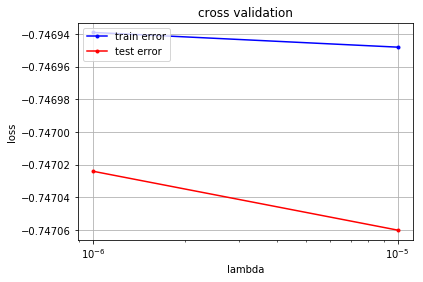

In [72]:
idx_min, loss_val_all, lambdas = k_fold.cross_validation_select(X_p, y, model, loss, seed = 1, k_fold = 5, lambdas = lambdas1, do_plot = True, do_tqdm = True)
np.mean(loss_val_all, axis=2)

In [49]:
tqdm.get_lock().locks = []

In [73]:
np.min(np.mean(loss_val_all, axis=2)[1])

-0.74705999999999995